# Projet IA.
## Livrable code


|Auteur|Modification|
|---|---|
|Majorel Pierre|2023/03/13|
|Alami Ouali Othmane|2023/03/13|
|Lopez Daniel|2023/03/13|

### Préparation de l'environnement

Ci-dessous quelques imports et précautions préalables à notre travail.

In [11]:
!pip install numpy
!pip install pandas
!pip install sklearn
!pip install seaborn

     ---------------------------------------- 0.0/293.3 kB ? eta -:--:--
     ---- ----------------------------------- 30.7/293.3 kB ? eta -:--:--
     ------- ----------------------------- 61.4/293.3 kB 656.4 kB/s eta 0:00:01
     ------- ----------------------------- 61.4/293.3 kB 656.4 kB/s eta 0:00:01
     ------- ----------------------------- 61.4/293.3 kB 656.4 kB/s eta 0:00:01
     ----------- ------------------------- 92.2/293.3 kB 403.5 kB/s eta 0:00:01
     ----------- ------------------------- 92.2/293.3 kB 403.5 kB/s eta 0:00:01
     --------------- -------------------- 122.9/293.3 kB 359.9 kB/s eta 0:00:01
     --------------- -------------------- 122.9/293.3 kB 359.9 kB/s eta 0:00:01
     --------------------- -------------- 174.1/293.3 kB 388.2 kB/s eta 0:00:01
     ----------------------- ------------ 194.6/293.3 kB 420.8 kB/s eta 0:00:01
     ----------------------- ------------ 194.6/293.3 kB 420.8 kB/s eta 0:00:01
     ------------------------------- ---- 256.0/293.3

In [40]:
# import
import numpy as np
import os

from numpy.random import default_rng
# stabilité du notebook d'une exécution à l'autre
random=default_rng(42) 

# jolies figures directement dans le notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# où sauver les figures
PROJECT_ROOT_DIR = r"." #changez ce chemin en fonction de votre dossier
CHAPTER_ID = "Images_Projet"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID) # le dossier doit exister

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### Import des données

Il convient d'automatiser l'import des données. On va implémenter une fonction qui se charge de :
* télécharger l'archive
* extraire les fichiers

On peut maintenant importer les données :

### Chargement des données en mémoire

In [12]:
###########TOUT A MODIFIER###########
import pandas as pd
import seaborn as sns 

def load_donnees_data():
    csv_path = "Donnees_triees.csv"
    return pd.read_csv(csv_path,sep=";", encoding = "ISO-8859-1")

donnees = load_donnees_data()
###########TOUT A MODIFIER###########

In [13]:
donnees.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,Gender,JobLevel,JobRole,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,WorkLifeBalance,JobInvolvement,Heure moyenne par jour sur l'annee,Nombre de jour travailles,Heure moyenne par jour sur l'annee2
0,1,51,0,2,Sales,6,2,1,1,Healthcare Representative,...,6,1,0,0,3.0,2.0,3,06:33:16,232,"6,554444444"
1,2,31,1,3,Research & Development,10,1,1,1,Research Scientist,...,3,5,1,4,3.0,4.0,2,06:58:47,236,"6,979722222"
2,3,32,0,3,Research & Development,17,4,0,4,Sales Executive,...,2,5,0,3,2.0,1.0,3,06:30:10,242,"6,502777778"
3,4,38,0,1,Research & Development,2,5,0,3,Human Resources,...,5,8,7,5,4.0,3.0,2,06:28:37,235,"6,476944444"
4,5,32,0,2,Research & Development,10,1,0,1,Sales Executive,...,2,6,0,4,4.0,3.0,3,07:30:55,245,"7,515277778"


In [14]:
donnees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   EmployeeID                           4410 non-null   int64  
 1   Age                                  4410 non-null   int64  
 2   Attrition                            4410 non-null   int64  
 3   BusinessTravel                       4410 non-null   int64  
 4   Department                           4410 non-null   object 
 5   DistanceFromHome                     4410 non-null   int64  
 6   Education                            4410 non-null   int64  
 7   Gender                               4410 non-null   int64  
 8   JobLevel                             4410 non-null   int64  
 9   JobRole                              4410 non-null   object 
 10  MonthlyIncome                        4410 non-null   int64  
 11  NumCompaniesWorked            

### Visualisation des données

#### Nous transformons les données non ordinales à l'aide du 1hotencoder

In [15]:
donnees_cat = donnees[["Department","JobRole","Heure moyenne par jour sur l'annee"]]
donnees_cat.head(10)

,Department,JobRole,Heure moyenne par jour sur l'annee
0,Sales,Healthcare Representative,06:33:16
1,Research & Development,Research Scientist,06:58:47
2,Research & Development,Sales Executive,06:30:10
3,Research & Development,Human Resources,06:28:37
4,Research & Development,Sales Executive,07:30:55
5,Research & Development,Research Director,09:48:12
6,Research & Development,Sales Executive,06:09:15
7,Research & Development,Sales Executive,06:15:42
8,Research & Development,Laboratory Technician,06:22:37
9,Research & Development,Laboratory Technician,06:20:52


In [16]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
donnees_cat_1hot = cat_encoder.fit_transform(donnees_cat)
donnees_cat_1hot # array creux par défaut

<4410x3800 sparse matrix of type '<class 'numpy.float64'>'
	with 13230 stored elements in Compressed Sparse Row format>

In [130]:
end_prepared_DF = pd.DataFrame(donnees_cat_1hot, columns=Column)

NameError: name 'Column' is not defined

#### Nous affichons un histogramme par attribut numérique

array([[<Axes: title={'center': 'EmployeeID'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Attrition'}>,
        <Axes: title={'center': 'BusinessTravel'}>,
        <Axes: title={'center': 'DistanceFromHome'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'JobLevel'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>],
       [<Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'StockOptionLevel'}>,
        <Axes: title={'center': 'TotalWorkingYears'}>,
        <Axes: title={'center': 'TrainingTimesLastYear'}>,
        <Axes: title={'center': 'YearsAtCompany'}>],
       [<Axes: title={'center': 'YearsSinceLastPromotion'}>,
        <Axes: title={'center': 'YearsWithCurrManager'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'WorkLifeBalance'}>,
   

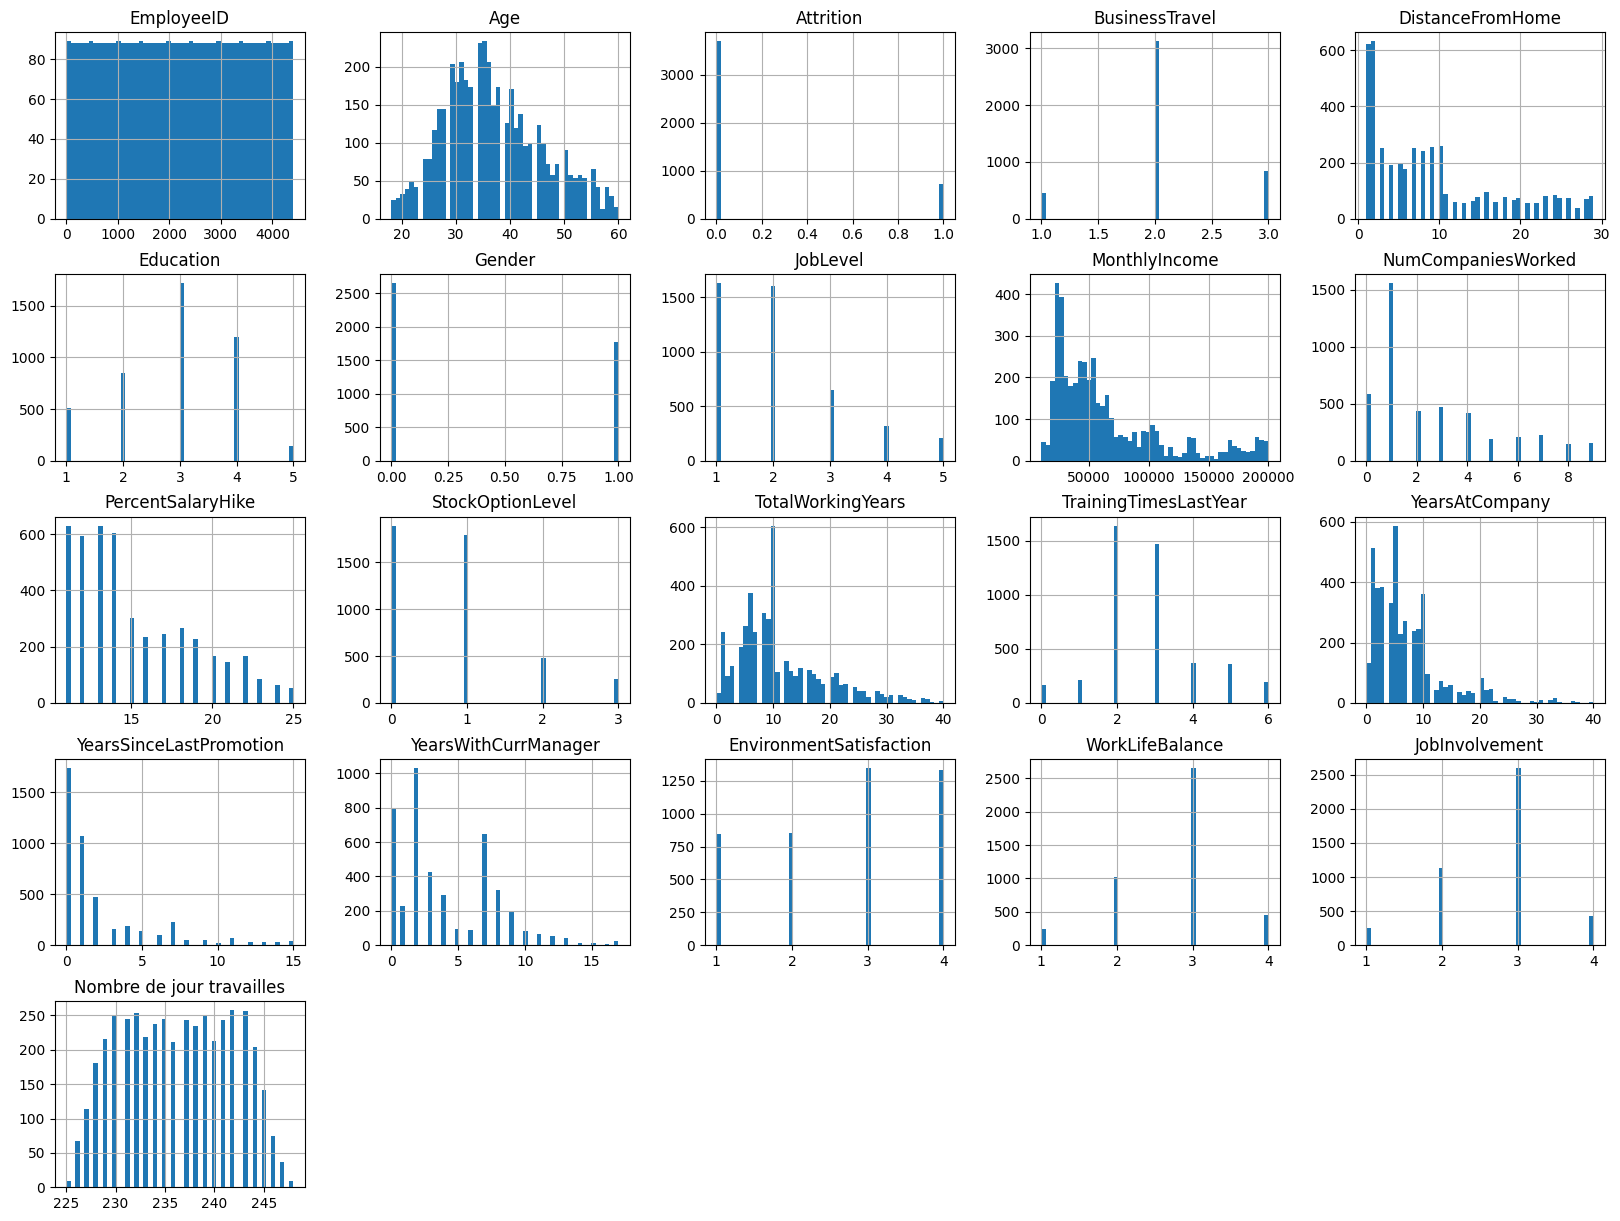

In [17]:
donnees.hist(bins=50, figsize=(20,15))

#### Nous affichons des boîtes à moustaches

<AxesSubplot:title={'center':'Nombre de jour travailles'}, xlabel='Attrition'>

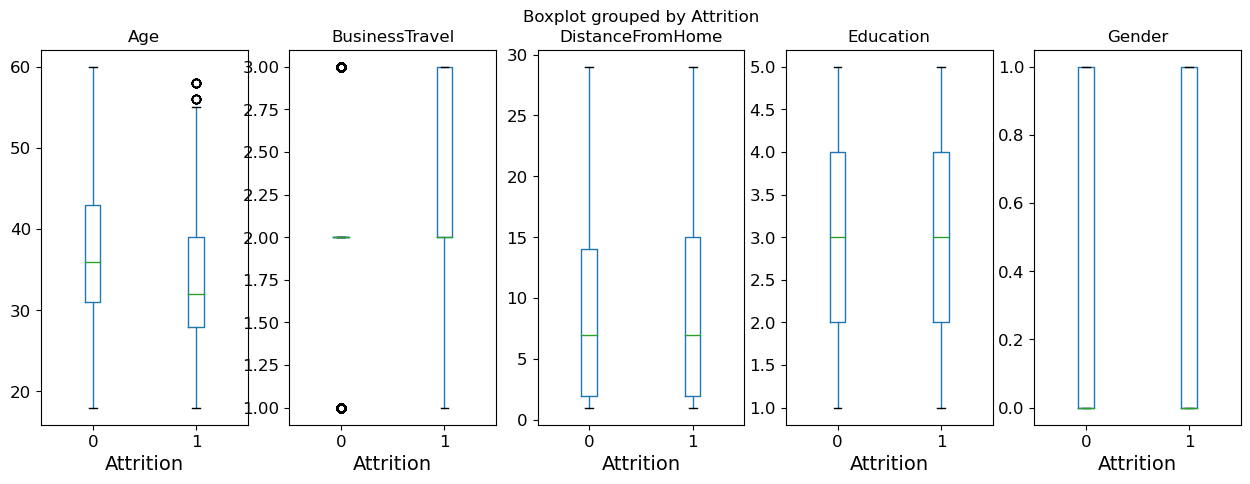

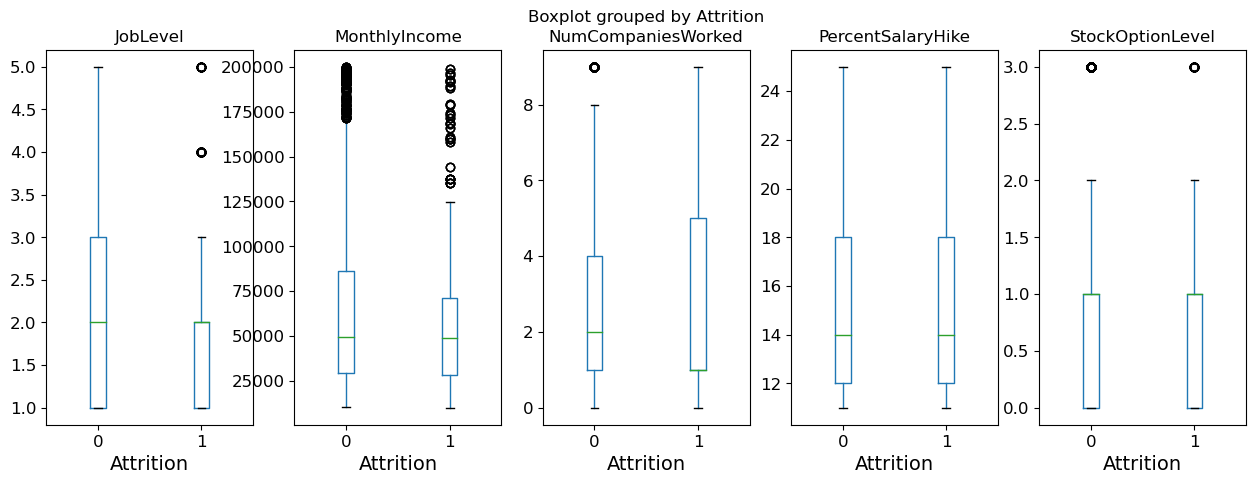

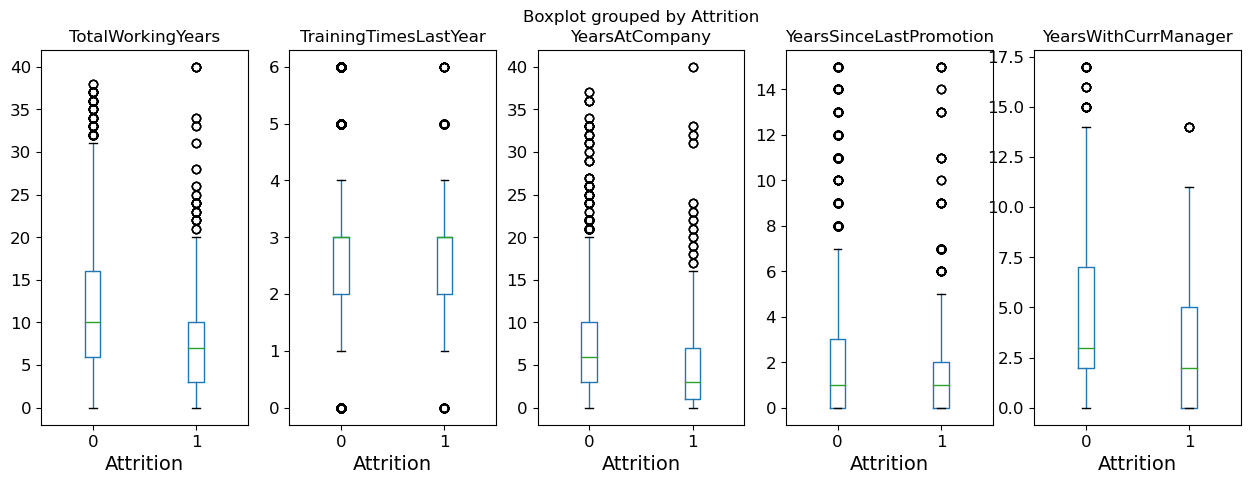

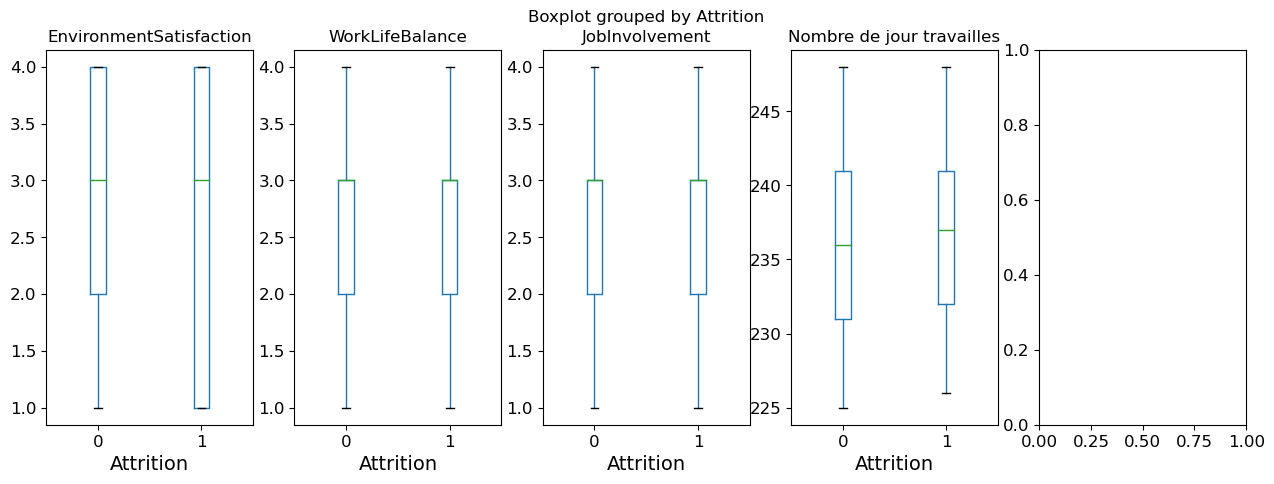

In [127]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(15, 5))
fig.subplots_adjust(wspace=0.2)
donnees.boxplot(by ='Attrition', column =['Age'], grid = False, ax=ax1) 
donnees.boxplot(by ='Attrition', column =['BusinessTravel'], grid = False, ax=ax2)
donnees.boxplot(by ='Attrition', column =['DistanceFromHome'], grid = False, ax=ax3)
donnees.boxplot(by ='Attrition', column =['Education'], grid = False, ax=ax4)
donnees.boxplot(by ='Attrition', column =['Gender'], grid = False, ax=ax5)

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(15, 5))
fig.subplots_adjust(wspace=0.2)
donnees.boxplot(by ='Attrition', column =['JobLevel'], grid = False, ax=ax1) 
donnees.boxplot(by ='Attrition', column =['MonthlyIncome'], grid = False, ax=ax2)
donnees.boxplot(by ='Attrition', column =['NumCompaniesWorked'], grid = False, ax=ax3)
donnees.boxplot(by ='Attrition', column =['PercentSalaryHike'], grid = False, ax=ax4)
donnees.boxplot(by ='Attrition', column =['StockOptionLevel'], grid = False, ax=ax5)

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(15, 5))
fig.subplots_adjust(wspace=0.2)
donnees.boxplot(by ='Attrition', column =['TotalWorkingYears'], grid = False, ax=ax1) 
donnees.boxplot(by ='Attrition', column =['TrainingTimesLastYear'], grid = False, ax=ax2)
donnees.boxplot(by ='Attrition', column =['YearsAtCompany'], grid = False, ax=ax3)
donnees.boxplot(by ='Attrition', column =['YearsSinceLastPromotion'], grid = False, ax=ax4)
donnees.boxplot(by ='Attrition', column =['YearsWithCurrManager'], grid = False, ax=ax5)

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(15, 5))
fig.subplots_adjust(wspace=0.2)
donnees.boxplot(by ='Attrition', column =['EnvironmentSatisfaction'], grid = False, ax=ax1) 
donnees.boxplot(by ='Attrition', column =['WorkLifeBalance'], grid = False, ax=ax2)
donnees.boxplot(by ='Attrition', column =['JobInvolvement'], grid = False, ax=ax3)
donnees.boxplot(by ='Attrition', column =['Nombre de jour travailles'], grid = False, ax=ax4)
#donnees.boxplot(by ='Attrition', column =['Heure moyenne par jour sur l'annee2'], grid = False, ax=ax5)

#### Nous effectuons ensuite une matrice de corrélation

C:\Users\peter\AppData\Local\Temp\ipykernel_10504\250917495.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = donnees.corr()


<Axes: >

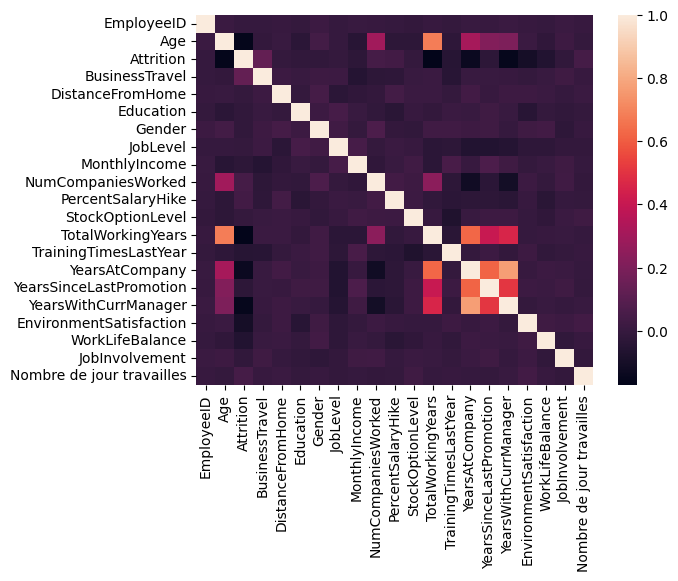

In [28]:
donnees_heatmap = donnees[['Attrition','Age','MonthlyIncome','DistanceFromHome','TotalWorkingYears','YearsAtCompany','Education','NumCompaniesWorked']]
corr = donnees.corr()
sns.heatmap(corr)

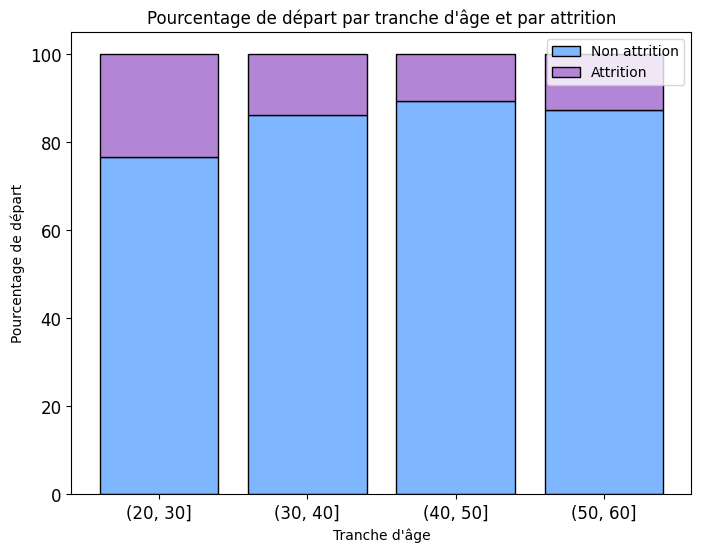

In [11]:
# Définition des tranches d'âge
bins = [20, 30, 40, 50, 60]

# Calcul du nombre d'employés pour chaque tranche d'âge et chaque catégorie d'attrition
grouped_data = donnees.groupby([pd.cut(donnees['Age'], bins), 'Attrition'])['Age'].count().unstack()

# Conversion des nombres en pourcentages
attrition_rates = grouped_data.apply(lambda x: x / x.sum() * 100, axis=1)

# Création de l'histogramme empilé
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(attrition_rates.index.astype(str), attrition_rates[0], color='#7EB6FF', edgecolor='black')
ax.bar(attrition_rates.index.astype(str), attrition_rates[1], bottom=attrition_rates[0], color='#B285D6', edgecolor='black')

# Ajout de titres et d'étiquettes
ax.set_xlabel('Tranche d\'âge')
ax.set_ylabel('Pourcentage de départ')
ax.set_title('Pourcentage de départ par tranche d\'âge et par attrition')

# Ajout d'une légende
ax.legend(['Non attrition', 'Attrition'])

plt.show()

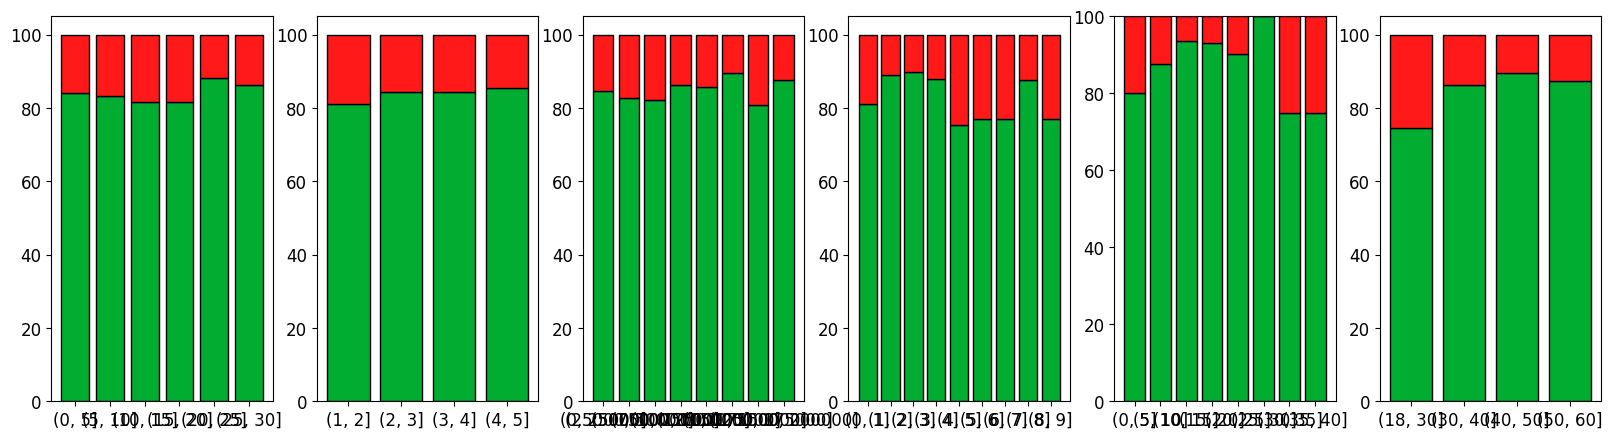

In [30]:
# Liste des variables pour lesquelles on veut afficher les pourcentages de départ
variables = ['DistanceFromHome','Education', 'MonthlyIncome','NumCompaniesWorked', 'YearsAtCompany','Age']

# Définition des tranches pour chaque variable
bins = {
    'DistanceFromHome': [0, 5, 10, 15, 20, 25, 30],
    'Education': [1, 2, 3, 4, 5],
    'MonthlyIncome': [0, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000],
    'NumCompaniesWorked': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'YearsAtCompany': [0, 5, 10, 15, 20, 25, 30, 35, 40],
    'Age': [18, 30, 40, 50, 60]
}

# Création des graphiques côte à côte
fig, axs = plt.subplots(nrows=1, ncols=len(variables), figsize=(20, 5))

for i, var in enumerate(variables):
    # Sélection des données pour la variable en cours
    donnees_var = donnees[['Attrition', var]]
    
    # Calcul du nombre d'employés pour chaque tranche de la variable et chaque catégorie d'attrition
    grouped_data = donnees_var.groupby([pd.cut(donnees_var[var], bins[var]), 'Attrition'])[var].count().unstack()
    
    # Conversion des nombres en pourcentages
    attrition_rates = grouped_data.apply(lambda x: x / x.sum() * 100, axis=1)
    
     # Affichage de l'histogramme empilé correspondant à la variable en cours
    axs[i].bar(attrition_rates.index.astype(str), attrition_rates[0], color='#00AD31', edgecolor='black')
    axs[i].bar(attrition_rates.index.astype(str), attrition_rates[1], bottom=attrition_rates[0], color='#FF1919', edgecolor='black')
    
    

### Création de la pipeline

In [ ]:
###########TOUT A MODIFIER###########
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num = housing.select_dtypes(include=[np.number]) 
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)
###########TOUT A MODIFIER###########

### Séparation du jeu de donnée

Ici nous allons couper notre jeu de données en deux 
* 1) Le train set
* 2) Le test set

In [31]:
###########TOUT A MODIFIER###########
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

donnees["Attrition"] = np.ceil(donnees["MonthlyIncome"]/1.5)
donnees["Attrition"].where(donnees["Attrition"] < 5, 5.0, inplace=True) # replace where false

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(donnees, donnees["Attrition"]):
    strat_train_set = donnees.loc[train_index]
    strat_test_set = donnees.loc[test_index]

for set_ in (strat_train_set, strat_test_set):
    set_.drop("Attrition", axis=1, inplace=True)

donnees = strat_train_set.copy()
###########TOUT A MODIFIER###########

### Utilisation du modèle X

### Indice de qualité du modèle X

#### Précision et recall

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores) # A changer

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): # A changer
    plt.plot(thresholds, precisions[:-1], "b-", label="Precision", linewidth=2) # A changer
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2) # A changer
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds) # A changer
plt.xlim([-700000, 700000])
save_fig("precision_recall_vs_threshold_plot")
plt.show()

def plot_precision_vs_recall(precisions, recalls): # A changer
    plt.plot(recalls, precisions, "k-", linewidth=2) # A changer
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls) # A changer
save_fig("precision_vs_recall_plot")
plt.show()

#### Courbe ROC

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores) # A changer

def plot_roc_curve(fpr, tpr, label=None): # A changer
    plt.plot(fpr, tpr, linewidth=2, label=label) # A changer
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr) # A changer
save_fig("roc_curve_plot")
plt.show()

### Cross validation pour tester le modèle X

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, # A changer
                         scoring="neg_mean_squared_error", cv=10) # A changer
tree_rmse_scores = np.sqrt(-scores) # A changer

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

### Utilisation du modèle Y

### Indice de qualité du modèle Y

#### Précision et recall

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores) # A changer

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): # A changer
    plt.plot(thresholds, precisions[:-1], "b-", label="Precision", linewidth=2) # A changer
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2) # A changer
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds) # A changer
plt.xlim([-700000, 700000])
save_fig("precision_recall_vs_threshold_plot")
plt.show()

def plot_precision_vs_recall(precisions, recalls): # A changer
    plt.plot(recalls, precisions, "k-", linewidth=2) # A changer
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls) # A changer
save_fig("precision_vs_recall_plot")
plt.show()

#### Courbe ROC

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores) # A changer

def plot_roc_curve(fpr, tpr, label=None): # A changer
    plt.plot(fpr, tpr, linewidth=2, label=label) # A changer
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr) # A changer
save_fig("roc_curve_plot")
plt.show()

### Cross validation pour tester le modèle Y

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, # A changer
                         scoring="neg_mean_squared_error", cv=10) # A changer
tree_rmse_scores = np.sqrt(-scores) # A changer

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

### Utilisation du modèle N

### Indice de qualité du modèle N

#### Précision et recall

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores) # A changer

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): # A changer
    plt.plot(thresholds, precisions[:-1], "b-", label="Precision", linewidth=2) # A changer
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2) # A changer
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds) # A changer
plt.xlim([-700000, 700000])
save_fig("precision_recall_vs_threshold_plot")
plt.show()

def plot_precision_vs_recall(precisions, recalls): # A changer
    plt.plot(recalls, precisions, "k-", linewidth=2) # A changer
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls) # A changer
save_fig("precision_vs_recall_plot")
plt.show()

#### Courbe ROC

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores) # A changer

def plot_roc_curve(fpr, tpr, label=None): # A changer
    plt.plot(fpr, tpr, linewidth=2, label=label) # A changer
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr) # A changer
save_fig("roc_curve_plot")
plt.show()

### Cross validation pour tester le modèle N

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, # A changer
                         scoring="neg_mean_squared_error", cv=10) # A changer
tree_rmse_scores = np.sqrt(-scores) # A changer

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

### Séléction du meilleur modèle

#### Courbe ROC de comparaison

Afin de choisir un modèle, nous allons utiliser les différentes courbes ROC réalisées précédement et les comparer.
Le modèle ayant la meilleure courbe sera celui que nous séléctionnerons pour la suite du projet.

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD") #A modifier
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest") #A modifier
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

### Entrainement sur le test set

In [ ]:
###########TOUT A MODIFIER###########
final_model = random_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
###########TOUT A MODIFIER###########

### Utilistation du modèle pour les prédictions

In [ ]:
###########TOUT A MODIFIER###########
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_rmse = mean_squared_error(y_test, final_predictions, squared = False)
final_rmse
###########TOUT A MODIFIER###########

#### Conclusion